
Prof Feedback: "In your top figure, you used the land features with countries. 
While this achieved your desired outcome of having a light colored background for land, 
it obscures a significant amount of data. You have two options:
1. You can actually draw your land below your data. 
   You can achieve this either by calling the "add_feature" functions before you call contourf. 
   Matplotlib draws things in the order you call them. The second option is to specify a zorder of 0 for your add_feature function. 
   By using zorder 1, it's being drawn after your contourf (zorder = 0 is the first one).

2. If you decide to use ax.coastlines, you can specify the color of the lines using the color keyword argument (color='white')."

<p style="font-size:30px;">Incorporating Prof. Feedback:</p>

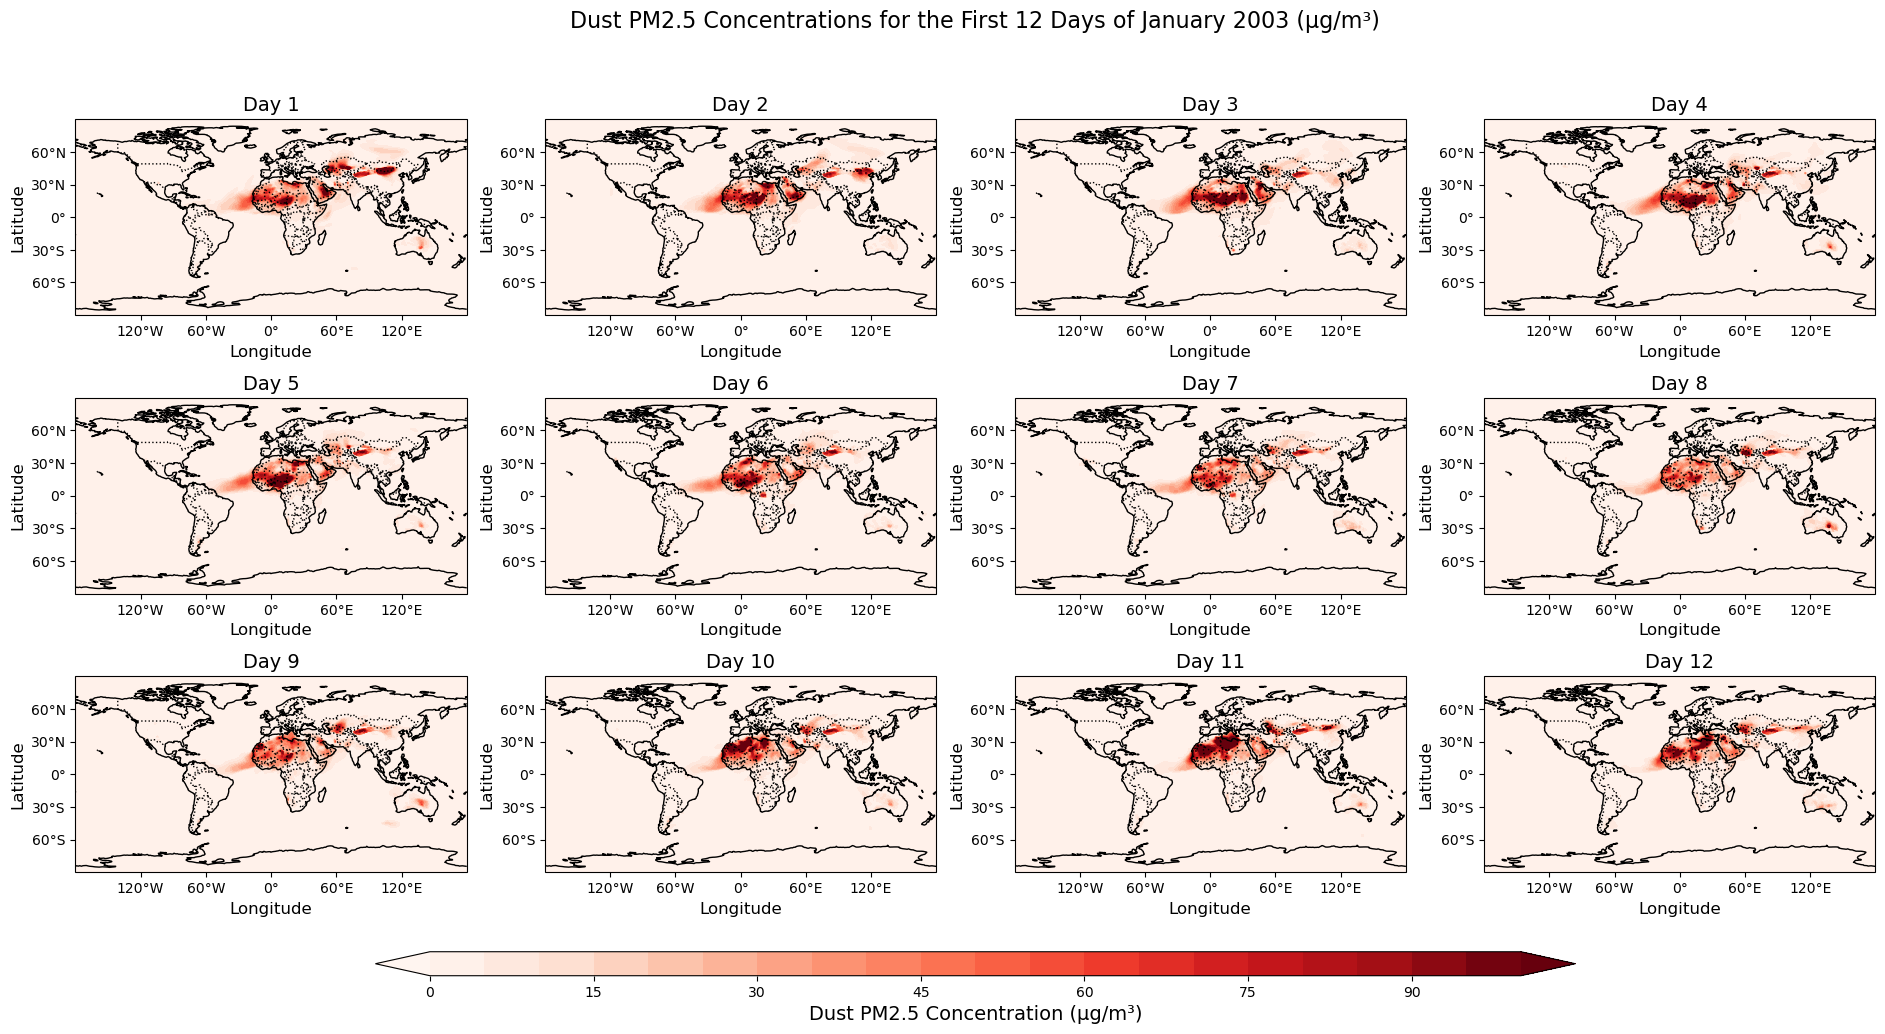

In [15]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import glob
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature
import numpy as np

# Step 1: Load the dataset
files = sorted(glob.glob("/home/salmadan/Desktop/groups/ESS3/Sara/daily/mean/DUST_PM_AOD_2003*_tot.nc"))
ds = xr.open_mfdataset(files, combine='by_coords', chunks={'time': 1})  # Load in chunks by time

# Step 2: Select data for January (1st to 12th)
jan_days = ds.sel(time=slice('2003-01-01', '2003-01-12'))

# Step 3: Create a figure with subplots for each day
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20, 12), subplot_kw={'projection': ccrs.PlateCarree()})
fig.suptitle('Dust PM2.5 Concentrations for the First 12 Days of January 2003 (µg/m³)', fontsize=16)

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Define levels for contour plotting
clevs = np.linspace(0, 100, 21)  # Adjust according to your data range

# Loop through the first 12 days of January
for i in range(12):
    ax = axs[i]
    dust_pm25_day = jan_days['dust_pm25'][i, :, :].compute()  # Compute only this day
    
    # Adding geographical features below the data layer
    ax.add_feature(cfeature.LAND, zorder=0, facecolor='#D5DDC9')  # Land with light color, drawn first
    ax.add_feature(cfeature.COASTLINE, edgecolor='Black', zorder=2)  # Coastlines drawn in white
    ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='Black', zorder=2)  # Borders in white with zorder 1

    # Plot the data above the land features
    lons = jan_days['lon']
    lats = jan_days['lat']
      # Longitude and latitude labels
    ax.set_xticks(np.arange(-180, 181, 60), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    
    ax.set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    ax.yaxis.set_major_formatter(lat_formatter)

    # Title for each subplot (Day X)
    ax.set_title(f'Day {i + 1}', fontsize=14)
    # Plot the data with the colormap
    cs = ax.contourf(lons, lats, dust_pm25_day, clevs, 
                     transform=ccrs.PlateCarree(), cmap='Reds', extend='both', zorder=1)

    # Setting titles using day names
    ax.set_title(f'Day {i + 1}', fontsize=14)
    ax.set_xlabel('Longitude', fontsize=12)
    ax.set_ylabel('Latitude', fontsize=12)
        
clevs = np.arange(0, 10, 5)

# Adjust layout to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95, wspace=0.2, hspace=0.25)

# Add a colorbar below the plots
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])  # Adjust the position as needed
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Dust PM2.5 Concentration (µg/m³)', fontsize=14)

# Show the plot
plt.show()


<p style="font-size:30px;">I think I prefer the figure shown below. If I were to publish a paper, I would likely use it.</p>

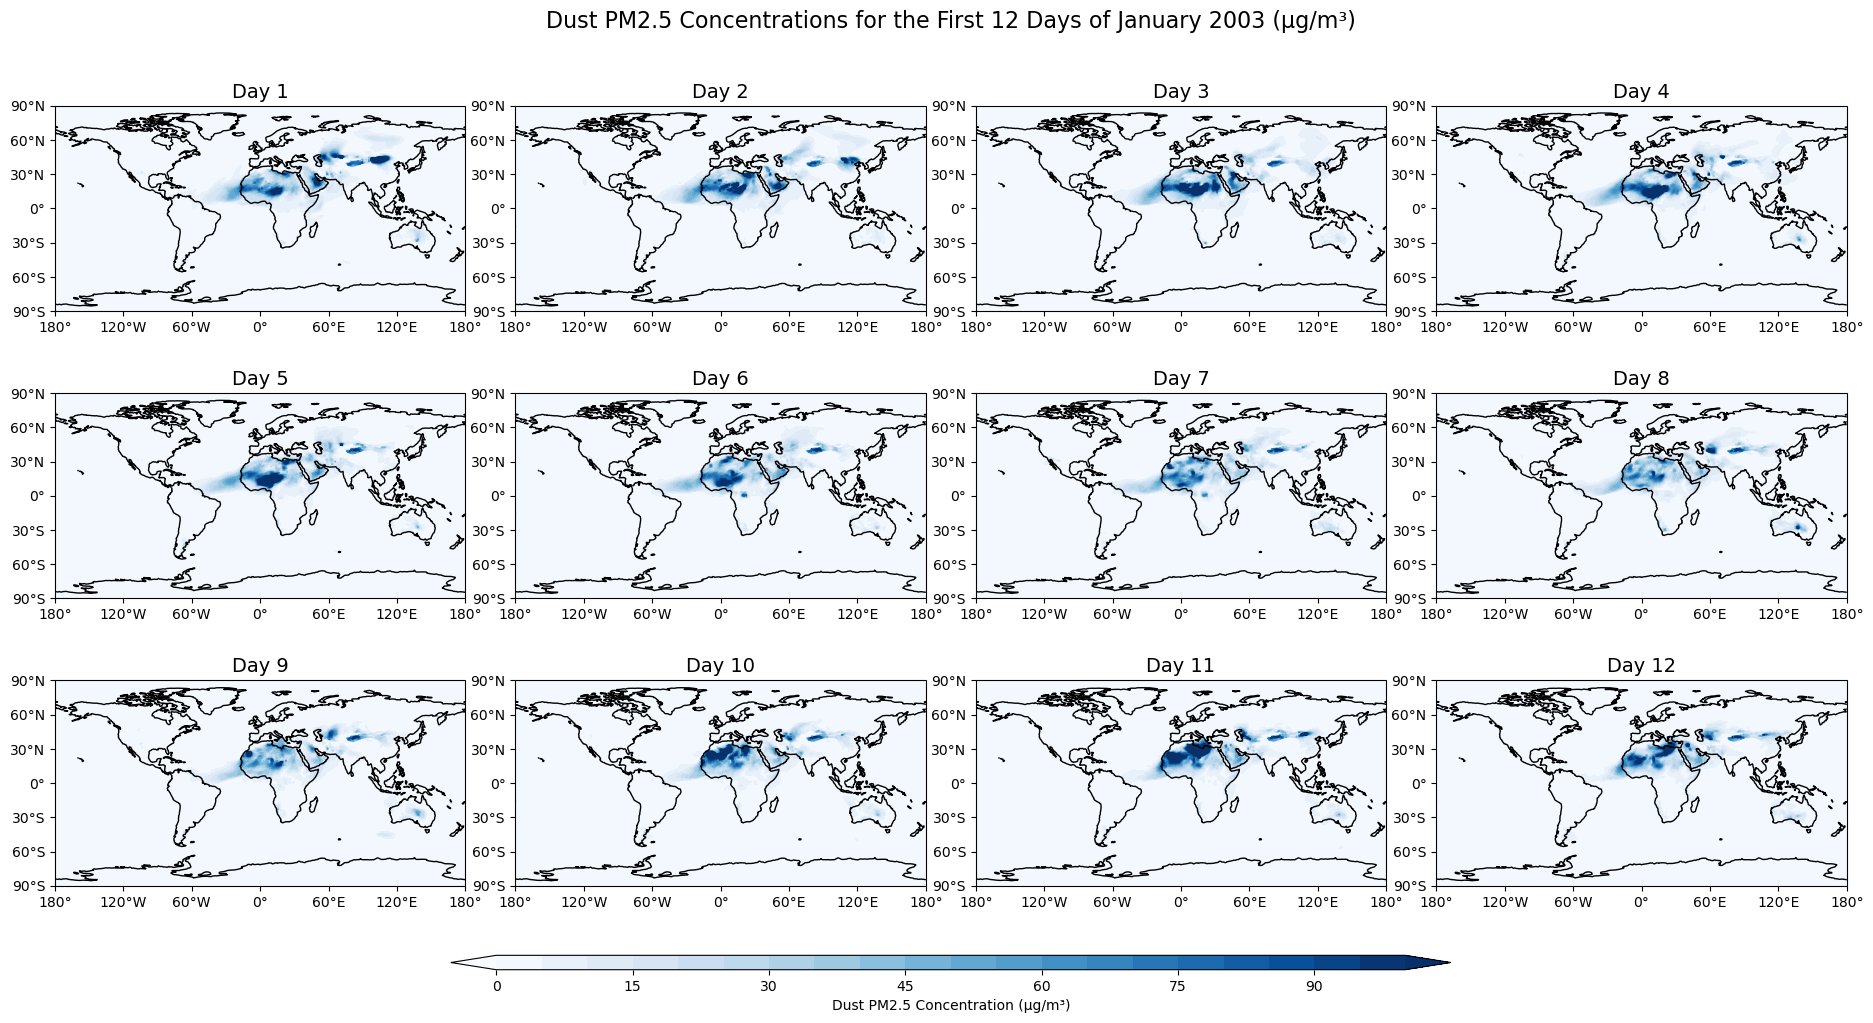

In [14]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import cartopy.mpl.ticker as cticker
import glob
import cartopy.feature as cfeature

# Load the dataset
files = sorted(glob.glob("/home/salmadan/Desktop/groups/ESS3/Sara/daily/mean/DUST_PM_AOD_2003*_tot.nc"))
ds = xr.open_mfdataset(files, combine='by_coords', chunks={'time': 1})

# Select data for January 1st to 12th
jan_days = ds.sel(time=slice('2003-01-01', '2003-01-12'))

# Create an array of evenly spaced longitudes using linspace
new_lons = np.linspace(jan_days['lon'].min().values, jan_days['lon'].max().values, len(jan_days['lon']))

# Interpolate the data along the longitude axis to have evenly spaced longitudes
jan_days_interp = jan_days.interp(lon=new_lons)

# Define levels for contour plotting, starting from 0
clevs = np.linspace(0.0, 100.0, 21)  # Adjust max value based on your data range

# Define the figure and subplots
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20, 12), subplot_kw={'projection': ccrs.PlateCarree()})
fig.suptitle('Dust PM2.5 Concentrations for the First 12 Days of January 2003 (µg/m³)', fontsize=16)

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Loop through the first 12 days of January and plot
for i in range(12):
    ax = axs[i]
    dust_pm25_day = jan_days_interp['dust_pm25'][i, :, :].compute()  # Compute only this day
    
    # Plot without adding a cyclic point
    lons = jan_days_interp['lon'].values
    lats = jan_days_interp['lat'].values
    
    # Contour plot with updated color map and levels
    cs = ax.contourf(lons, lats, dust_pm25_day, clevs, 
                     transform=ccrs.PlateCarree(), cmap='Blues', extend='both', vmin=0)
    
    # Add coastlines 
    ax.coastlines()

    # Longitude and latitude labels
    ax.set_xticks(np.arange(-180, 181, 60), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    
    ax.set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    ax.yaxis.set_major_formatter(lat_formatter)

    # Title for each subplot (Day X)
    ax.set_title(f'Day {i + 1}', fontsize=14)

# Adjust layout for better visibility
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95, wspace=0.1, hspace=0.4)

# Add colorbar below the plots
cbar_ax = fig.add_axes([0.25, 0.18, 0.5, 0.012])
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal', label='Dust PM2.5 Concentration (\u00b5g/m³)')

# Display the plot
plt.show()
